In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image, ImageEnhance, ImageFilter # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [2]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('leapGestRecog\\00'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [3]:
# write functinos to create new images by augmenting data in the following ways:
# 1. Flip the image horizontally
# 2. Flip the image vertically
# 3. Rotate the image by 90 degrees
# 4. Rotate the image by 180 degrees
# 5. Rotate the image by 270 degrees
# 6. Randomly resize the image
# 7. Randomly crop the image
# 8. Randomly change the brightness of the image
# 9. Add Gaussian blur to the image
# 10. Add random noise to the image
# 11. Random rotation to the image
# the functinons should keep the same shape of the original image

# 1. Flip the image horizontally
def flip_horizontal(image):
    return image[:,::-1]

# 2. Flip the image vertically
def flip_vertical(image):
    return image[::-1,:]

# 3. Rotate the image by 90 degrees and keep the image shape
def rotate_90(image):
    image = Image.fromarray(image)
    image = image.convert('L')
    return np.array(image.rotate(90))

# 4. Rotate the image by 180 degrees and keep the image shape
def rotate_180(image):
    image = Image.fromarray(image)
    image = image.convert('L')
    return np.array(image.rotate(180))

# 5. Rotate the image by 270 degrees and keep the image shape
def rotate_270(image):
    image = Image.fromarray(image)
    image = image.convert('L')
    return np.array(image.rotate(270))

# # 6. Randomly resize the image and keep the image shape
# def resize_random(image):
#     image = Image.fromarray(image)
#     image = image.convert('L')
#     return np.array(image.resize((np.random.randint(0, 320), np.random.randint(0, 120))))

# # 7. Randomly crop the image and keep the image shape
# def crop_random(image):
#     image = Image.fromarray(image)
#     image = image.convert('L')
#     return np.array(image.crop((np.random.randint(0, 320), np.random.randint(0, 120), np.random.randint(0, 320), np.random.randint(0, 120))))
    
# 8. Randomly change the brightness of the image
def brightness_random(image):
    image = Image.fromarray(image)
    image = image.convert('L')
    enhancer = ImageEnhance.Brightness(image)
    return np.array(enhancer.enhance(np.random.uniform(0.5, 1.5)))

# 9. Add Gaussian blur to the image
def blur_random(image):
    image = Image.fromarray(image)
    image = image.convert('L')
    return np.array(image.filter(ImageFilter.GaussianBlur(radius=1)))

# 10. Add random noise to the image
def noise_random(image):
    row,col= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy

# 11. Random rotation to the image
def rotate_random(image):
    image = Image.fromarray(image)
    image = image.convert('L')
    return np.array(image.rotate(np.random.randint(0, 360)))


In [4]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
aug_count = 0
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('leapGestRecog\\0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('leapGestRecog\\0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('leapGestRecog\\0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                if aug_count == 0:
                    x_data.append(arr)
                if aug_count == 1:
                    x_data.append(flip_horizontal(arr))
                if aug_count == 2:
                    x_data.append(flip_vertical(arr))
                if aug_count == 3:
                    x_data.append(rotate_90(arr))
                if aug_count == 4:
                    x_data.append(rotate_180(arr))
                if aug_count == 5:
                    x_data.append(rotate_270(arr))
                if aug_count == 6:
                    x_data.append(noise_random(arr))
                if aug_count == 7:
                    x_data.append(rotate_random(arr))
                    aug_count = 0
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

In [4]:
datacount

20000

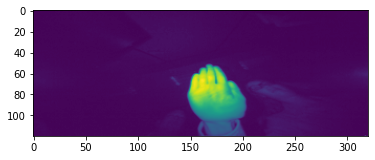

In [5]:
plt.imshow(x_data[1])
plt.show()

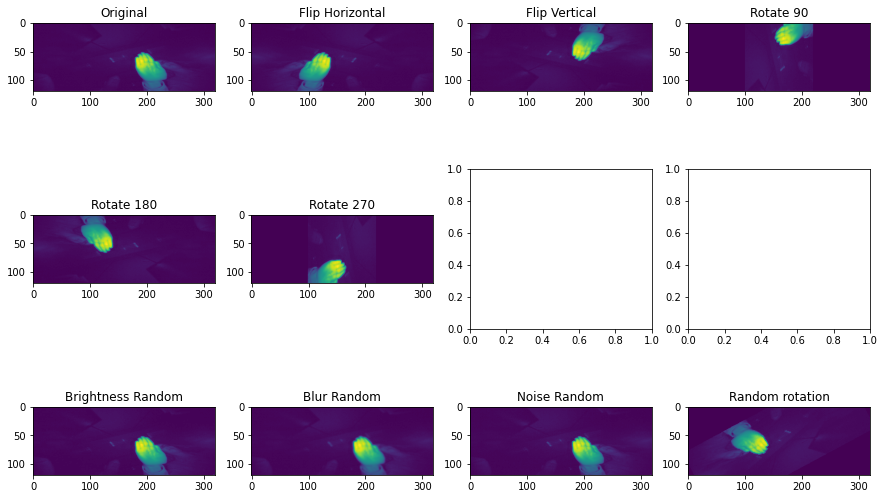

In [8]:
# use the first image in the dataset as an example
image = x_data[0]

# flip the image horizontally
image_flip_horizontal = flip_horizontal(image)

# flip the image vertically
image_flip_vertical = flip_vertical(image)

# rotate the image by 90 degrees
image_rotate_90 = rotate_90(image)

# rotate the image by 180 degrees
image_rotate_180 = rotate_180(image)

# rotate the image by 270 degrees
image_rotate_270 = rotate_270(image)

# randomly resize the image
# image_resize_random = resize_random(image)

# randomly crop the image
# image_crop_random = crop_random(image)

# randomly change the brightness of the image
image_brightness_random = brightness_random(image)

# add Gaussian blur to the image
image_blur_random = blur_random(image)

# add random noise to the image
image_noise_random = noise_random(image)

# random rotation to the image
image_rotate_random = rotate_random(image)

# plot the original image and the augmented images
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original")
axs[0, 1].imshow(image_flip_horizontal)
axs[0, 1].set_title("Flip Horizontal")
axs[0, 2].imshow(image_flip_vertical)
axs[0, 2].set_title("Flip Vertical")
axs[0, 3].imshow(image_rotate_90)
axs[0, 3].set_title("Rotate 90")
axs[1, 0].imshow(image_rotate_180)
axs[1, 0].set_title("Rotate 180")
axs[1, 1].imshow(image_rotate_270)
axs[1, 1].set_title("Rotate 270")
# axs[1, 2].imshow(image_resize_random)
# axs[1, 2].set_title("Resize Random")
# axs[1, 3].imshow(image_crop_random)
# axs[1, 3].set_title("Crop Random")
axs[2, 0].imshow(image_brightness_random)
axs[2, 0].set_title("Brightness Random")
axs[2, 1].imshow(image_blur_random)
axs[2, 1].set_title("Blur Random")
axs[2, 2].imshow(image_noise_random)
axs[2, 2].set_title("Noise Random")
axs[2, 3].imshow(image_rotate_random)
axs[2, 3].set_title("Random rotation")
plt.show()

In [13]:
# create a function to generate new images
# the function should take a list of images and a list of labels as input
# the function should take each image and apply all the augmentation functions to it
# then it should save the new images to a new list
# the function should return the new list of images and the list of labels
def generate_new_images(images, labels):
    new_images = []
    new_labels = []
    for image, label in zip(images, labels):
        # generate random numbers to decide whether to apply the augmentation functions
        # random number between 0 and 2 inclusive
        rand_int = np.random.randint(0, 3)

        # randomly flip the image horizontally
        if rand_int == 0:
            new_images.append(flip_horizontal(image))
            new_labels.append(label)
            new_images.append(rotate_180(image))
            new_labels.append(label)
            new_images.append(blur_random(image))
            new_labels.append(label)
        
        if rand_int == 1:
            new_images.append(flip_vertical(image))
            new_labels.append(label)
            new_images.append(rotate_270(image))
            new_labels.append(label)
            new_images.append(noise_random(image))
            new_labels.append(label)

        if rand_int == 2:
            new_images.append(rotate_90(image))
            new_labels.append(label)
            new_images.append(brightness_random(image))
            new_labels.append(label)
            new_images.append(rotate_random(image))
            new_labels.append(label)
        
    return new_images, np.array(new_labels)

# generate new images
new_images, new_labels = generate_new_images(x_data, y_data)

In [20]:
ims = np.array(new_images, dtype = 'float32')

In [21]:
X_data = np.concatenate((x_data, new_images), axis=0)
Y_data = np.concatenate((y_data, new_labels), axis=0)

MemoryError: Unable to allocate 17.2 GiB for an array with shape (60000, 120, 320) and data type float64

In [5]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [6]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [8]:
from keras import layers
from keras import models
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 158, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 36, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 18, 64)        0

In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
keras.backend.set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1



In [11]:
with tf.device('GPU:0'):
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 43s 97ms/step - loss: 0.2652 - accuracy: 0.9153 - val_loss: 0.0024 - val_accuracy: 0.9990
Epoch 2/10
250/250 [==============================] - 23s 92ms/step - loss: 0.0196 - accuracy: 0.9956 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/10
250/250 [==============================] - 23s 91ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0039 - val_accuracy: 0.9980
Epoch 4/10
250/250 [==============================] - 23s 91ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 5.1649e-04 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 23s 91ms/step - loss: 0.0066 - accuracy: 0.9994 - val_loss: 0.0128 - val_accuracy: 0.9965
Epoch 6/10
250/250 [==============================] - 23s 92ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 2.8039e-04 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 23s 91ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 5.7539e-05 - v

In [12]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 2s 20ms/step - loss: 2.2138e-04 - accuracy: 1.0000
Accuracy:1.0


In [13]:
model.save('aug_model.h5')

In [14]:
predictions = model.predict(x_test) # Make predictions towards the test set
np.argmax(predictions[0]), np.argmax(y_test[0]) # If same, got it right


63/63 [==============================] - 1s 15ms/step


(3, 3)

In [15]:
import cv2

In [16]:
# Initialize the webcam for Hand Gesture Recognition Python project
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
queue = []
while True:
    X=[]
    # Read each frame from the webcam
    _, frame = cap.read()
    x , y, c = frame.shape
    # print(frame.shape)

    # don't know if this matters
    # Flip the frame vertically
    # frame = cv2.flip(frame, 1)


    # convert frame to black and white
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (320, 120))

    # print(frame.shape)

    X.append(img)
    
    X = np.array(X, dtype="float32")
    X = X.reshape(1, 120, 320, 1) # Needed to reshape so CNN knows it's different images
    # print(X.shape)
    prediction = model.predict(X, verbose=0)
    # print(np.argmax(prediction))
    

    # Show the final output
    className = reverselookup[np.argmax(prediction)]
    queue.append(className)
    if len(queue) > 10:
        queue.pop(0)
    temp_set = set(queue)
    if len(temp_set) == 1 and queue[0] == '07_ok':
        cv2.imwrite('c1.png', frame)
        cv2.destroyAllWindows()
        break

    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow("Output", frame)
    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

In [32]:

# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = np.argmax(true_label_array[i])
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'white'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()
     

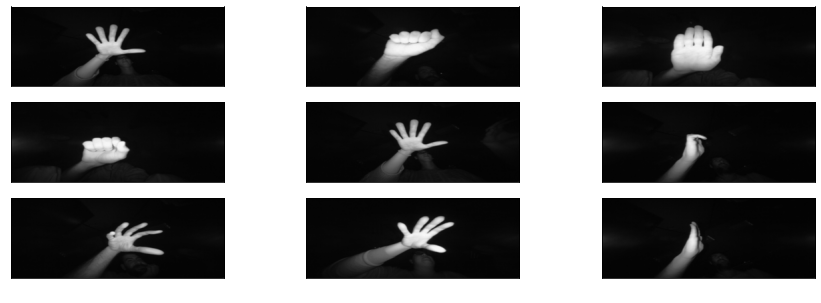

In [33]:
validate_9_images(predictions, y_test, x_test)

In [31]:
y_pred = np.argmax(predictions, axis=1)

In [37]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [43]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,183,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,219,0,0,0,0,0,0,0,0
Actual L,0,0,183,0,0,0,0,0,0,0
Actual Fist (H),0,0,0,187,0,0,0,0,0,0
Actual Fist (V),0,0,0,0,217,0,0,0,0,0
Actual Thumbs up,0,0,0,0,0,208,0,0,0,0
Actual Index,0,0,0,0,0,0,187,0,0,0
Actual OK,0,0,0,0,0,0,0,189,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,220,0
Actual C,0,0,0,0,0,0,0,0,0,207


In [41]:
y_test = np.argmax(y_test, axis=1)

In [42]:
y_test

array([3, 9, 2, ..., 0, 8, 1], dtype=int64)

In [40]:
y_pred

array([3, 9, 2, ..., 0, 8, 1], dtype=int64)

C:\Users\Axel\AppData\Local\Temp\ipykernel_2388\1849251880.py:240: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


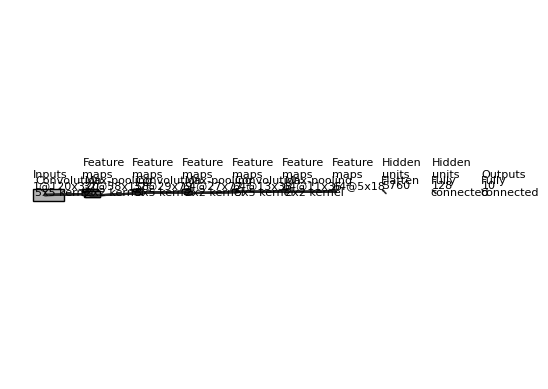

In [54]:
"""
Copyright (c) 2017, Gavin Weiguang Ding
All rights reserved.

Redistribution and use in source and binary forms, with or without
    modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
    list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
    this list of conditions and the following disclaimer in the documentation
    and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors
    may be used to endorse or promote products derived from this software
    without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
    AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
    IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
    ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE
    LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR
    CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF
    SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
    INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN
    CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
    ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
    POSSIBILITY OF SUCH DAMAGE.
"""


import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.


def add_layer(patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(patches, colors, size=(24, 24),
                            num=5, num_max=8,
                            num_dots=4,
                            top_left=[0, 0],
                            loc_diff=[3, -3],
                            ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    this_num = min(num, num_max)
    start_omit = (this_num - num_dots) // 2
    end_omit = this_num - start_omit
    start_omit -= 1
    for ind in range(this_num):
        if (num > num_max) and (start_omit < ind < end_omit):
            omit = True
        else:
            omit = False

        if omit:
            patches.append(
                Circle(loc_start + ind * loc_diff + np.array(size) / 2, 0.5))
        else:
            patches.append(Rectangle(loc_start + ind * loc_diff,
                                     size[1], size[0]))

        if omit:
            colors.append(Black)
        elif ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(patches, colors, start_ratio, end_ratio, patch_size, ind_bgn,
                top_left_list, loc_diff_list, num_show_list, size_list):

    start_loc = top_left_list[ind_bgn] \
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn]) \
        + np.array([start_ratio[0] * (size_list[ind_bgn][1] - patch_size[1]),
                    - start_ratio[1] * (size_list[ind_bgn][0] - patch_size[0])]
                   )




    end_loc = top_left_list[ind_bgn + 1] \
        + (num_show_list[ind_bgn + 1] - 1) * np.array(
            loc_diff_list[ind_bgn + 1]) \
        + np.array([end_ratio[0] * size_list[ind_bgn + 1][1],
                    - end_ratio[1] * size_list[ind_bgn + 1][0]])


    patches.append(Rectangle(start_loc, patch_size[1], -patch_size[0]))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)



def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='sans-serif', size=8)


if __name__ == '__main__':

    fc_unit_size = 2
    layer_width = 500
    flag_omit = True

    patches = []
    colors = []

    fig, ax = plt.subplots()


    ############################
    # conv layers
    size_list = [(120, 320), (58, 158), (29, 79), (27, 77), (13, 38), (11, 36), (5, 18)]
    num_list = [1, 32, 32, 64, 64, 64, 64]
    x_diff_list = [0, layer_width, layer_width, layer_width, layer_width, layer_width, layer_width]
    text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
    loc_diff_list = [[3, -3]] * len(size_list)

    num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)-1,-1,-1):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumConvMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
            num_list[ind], size_list[ind][0], size_list[ind][1]))

    ############################
    # in between layers
    start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8],   [0.4, 0.5], [0.4, 0.8]]
    patch_size_list = [(5, 5), (2, 2), (5, 5), (2, 2), (5, 5), (2, 2)]
    ind_bgn_list = range(len(patch_size_list))
    text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling', 'Convolution', 'Max-pooling']

    for ind in range(len(patch_size_list)):
        add_mapping(
            patches, colors, start_ratio_list[ind], end_ratio_list[ind],
            patch_size_list[ind], ind,
            top_left_list, loc_diff_list, num_show_list, size_list)
        label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
            patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[26, -65]
        )


    ############################
    # fully connected layers
    size_list = [(fc_unit_size, fc_unit_size)] * 3
    num_list = [5760, 128, 10]
    num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
    x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
    loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
    text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

    for ind in range(len(size_list)):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumFcMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind],
                      loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}'.format(
            num_list[ind]))

    text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

    for ind in range(len(size_list)):
        label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color * np.ones(3))
        if isinstance(patch, Line2D):
            ax.add_line(patch)
        else:
            patch.set_edgecolor(Black * np.ones(3))
            ax.add_patch(patch)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    fig.set_size_inches(8, 2.5)

    fig_dir = './'
    fig_ext = '.png'
    fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
                bbox_inches='tight', pad_inches=0)